In [61]:
library(IRdisplay)
library(repr)
library(magrittr)
library(VennDiagram)
library(igraph)
library(rPython)
library(leaflet)
library(osmar)

In [62]:
#install.packages("")

In [7]:
display_html("<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron');
h1 {color: #3636ff; font-family:'Orbitron' ; text-shadow: 5px 5px 5px #aaa;}
div.output_area pre , div.output_area html {font-size:110%; color: #3636ff;}     
</style>")

## For creating posts

# When you need to draw sets' intersection
Jupyter Notebook & R Kernel

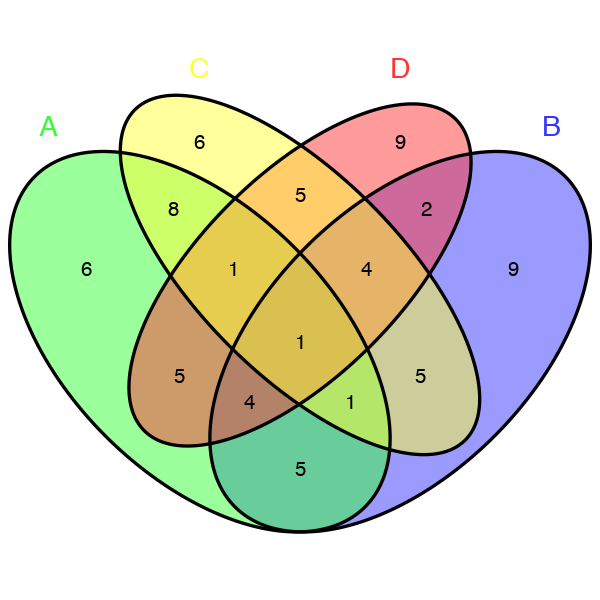

In [2]:
library(VennDiagram)
options(repr.plot.width=5,repr.plot.height=5)
c <- c("#36ff36","#3636ff","#ffff36","#ff3636")
venn.plot <- draw.quad.venn(
    area1=31,area2=31,area3=31,area4=31, 
    n12=11,n13=11,n14=11,n23=11,n24=11,n34=11, 
    n123=2,n124=5,n134=2,n234=5,n1234=1,
    category=c("A","B","C","D"),fill=c,cat.col=c,cat.cex=1.4)

# When you need to draw weighted graphs
Jupyter Notebook & R Kernel

In [4]:
library(igraph)
edges <- c('A','B', 'A','C', 'A','F', 'B','C', 'B','D',
           'C','D', 'C','E', 'D','E', 'D','F', 'E','F')
weights <- c(3,8,16,4,7,2,6,5,4,2)
g <- graph(edges, directed=FALSE)%>%
           set_edge_attr("weight", value=weights)
shortest_path <- get.shortest.paths(g,'A','F')
adjm <- get.adjacency(g, attr="weight",sparse=FALSE)
adjm[sort(rownames(adjm)),sort(colnames(adjm))]

,A,B,C,D,E,F
A,0,3,8,0,0,16
B,3,0,4,7,0,0
C,8,4,0,2,6,0
D,0,7,2,0,5,4
E,0,0,6,5,0,2
F,16,0,0,4,2,0


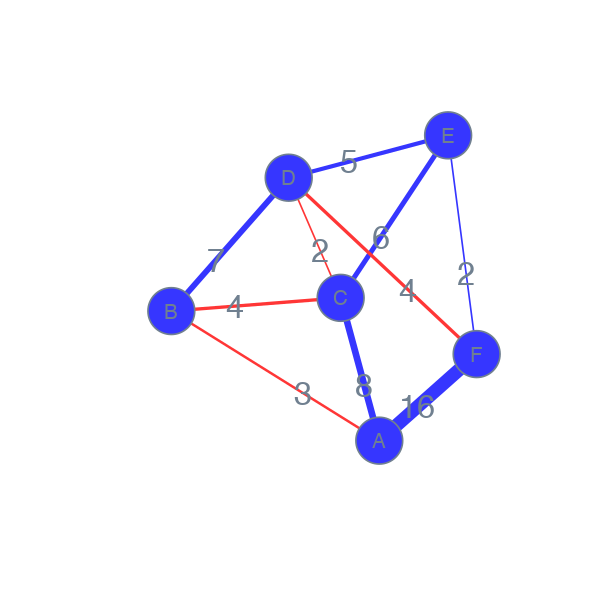

In [31]:
options(repr.plot.width=5,repr.plot.height=5)
E(g)$color <- "#3636ff"
E(g,path=unlist(shortest_path$vpath))$color <- "#ff3636"
plot(g,layout=layout_nicely(g),
     vertex.color="#3636ff",vertex.size=30,vertex.label.color="slategray",
     vertex.frame.color="slategray",edge.label.color="slategray",
     edge.label=E(g)$weight,edge.label.cex=1.6,edge.width=E(g)$weight/2)

# How to get a map in your notebook in a minute
Jupyter Notebook & R Kernel

In [60]:
library(leaflet); library(magrittr)
m <- leaflet() %>% setView(lng=38.9873,lat=55.8098,zoom=13)
m %>% addProviderTiles(providers$CartoDB.Positron)

HTML widgets cannot be represented in plain text (need html)

# If you think it's hard to create a map
# with absolutely free and open sources.
# Think again
Jupyter Notebook & R Kernel

Getting building contours as an example

In [67]:
library(osmar)
src <- osmsource_api(url="https://api.openstreetmap.org/api/0.6/"); 
box <- center_bbox(38.9873,55.8098,3000,3000); oz <- get_osm(box,source=src)

In [93]:
bg <- find(oz, way(tags(k=="building"))); bg <- find_down(oz,way(bg))
bg_oz <- subset(oz,ids=bg); bg_poly <- as_sp(bg_oz,"polygons")

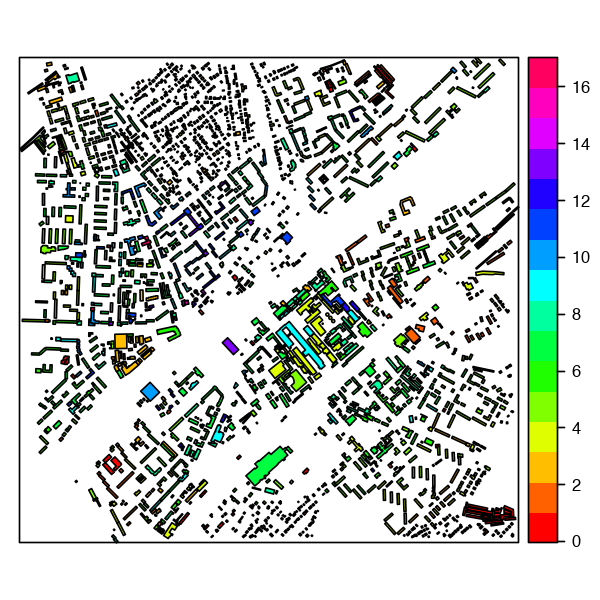

In [94]:
options(repr.plot.width=5,repr.plot.height=5)
spplot(bg_poly,col.regions=rainbow(16),c("version"))